# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date_unix = city_weather["dt"]
        city_date_formatted = time.strftime('%Y-%m-%d', time.localtime(city_date_unix))

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date_formatted})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taiohae
City not found. Skipping...
Processing Record 2 of Set 1 | anadyr
Processing Record 3 of Set 1 | mount pearl
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | forio
Processing Record 6 of Set 1 | crane
Processing Record 7 of Set 1 | saipan
Processing Record 8 of Set 1 | san luis de la loma
Processing Record 9 of Set 1 | kuta
Processing Record 10 of Set 1 | naracoorte
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | vershino-darasunskiy
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | tazovsky
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | parfino
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | la passe
Processing Record 20 of Set 1 | afaahiti
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | b

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,-12.72,71,10,15.00,RU,2023-11-13
1,mount pearl,47.5166,-52.7813,-0.58,82,100,4.12,CA,2023-11-13
2,adamstown,-25.0660,-130.1015,22.78,85,100,7.80,PN,2023-11-13
3,forio,40.7342,13.8646,18.23,93,42,3.08,IT,2023-11-13
4,crane,31.3974,-102.3501,11.13,83,100,3.42,US,2023-11-13


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-12.72,71,10,15.00,RU,2023-11-13
1,mount pearl,47.5166,-52.7813,-0.58,82,100,4.12,CA,2023-11-13
2,adamstown,-25.0660,-130.1015,22.78,85,100,7.80,PN,2023-11-13
3,forio,40.7342,13.8646,18.23,93,42,3.08,IT,2023-11-13
4,crane,31.3974,-102.3501,11.13,83,100,3.42,US,2023-11-13


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

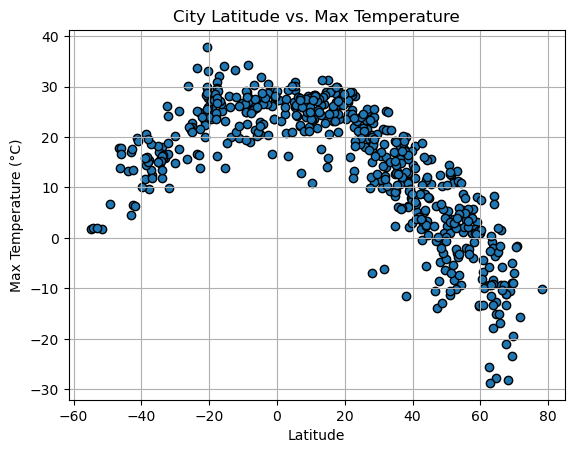

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black')

# Set the title and labels
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

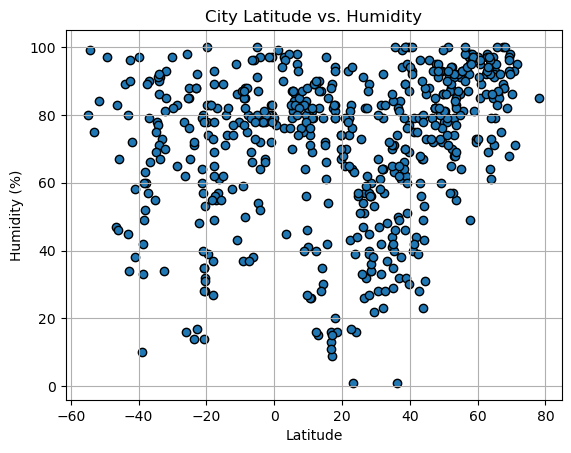

In [9]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

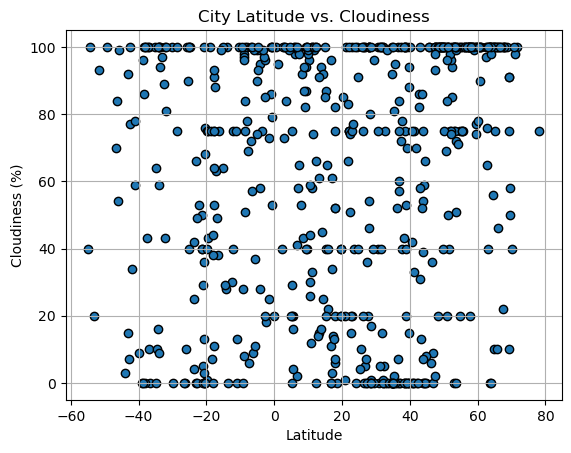

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

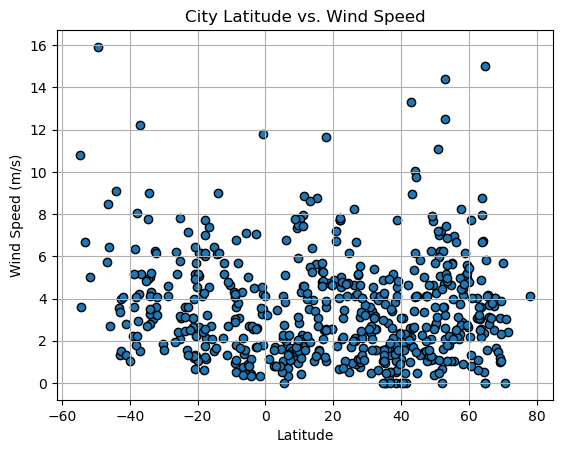

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def regression_constructor(x_values, y_values,x_label,y_label,annote_x, annote_y):
    plt.figure()
    slope, intercept, rvalue, p_value, std_err = linregress(x_values, y_values)
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.scatter(x_values,y_values)
    plt.plot(x_values,slope * x_values + intercept,"r-")
    # Label plot and annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(annote_x,annote_y),fontsize=15,color="red")
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    # Show plot
    plt.show()


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,-12.72,71,10,15.00,RU,2023-11-13
1,mount pearl,47.5166,-52.7813,-0.58,82,100,4.12,CA,2023-11-13
3,forio,40.7342,13.8646,18.23,93,42,3.08,IT,2023-11-13
4,crane,31.3974,-102.3501,11.13,83,100,3.42,US,2023-11-13
5,saipan,15.1355,145.7010,31.39,66,40,8.75,MP,2023-11-13


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,22.78,85,100,7.80,PN,2023-11-13
7,kuta,-8.7233,115.1723,28.97,88,75,3.60,ID,2023-11-13
8,naracoorte,-36.9579,140.7383,12.44,90,100,1.52,AU,2023-11-13
12,edinburgh of the seven seas,-37.0676,-12.3116,13.47,79,10,12.21,SH,2023-11-13
18,afaahiti,-17.7500,-149.2833,28.93,89,91,6.02,PF,2023-11-13


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7613381125925177


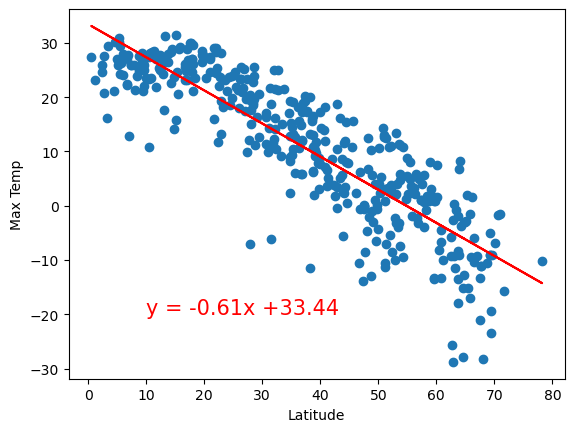

In [48]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
annote_x = 10
annote_y = -20

regression_constructor(x_values, y_values, x_label, y_label,annote_x,annote_y)


The r-value is: 0.5218260341889844


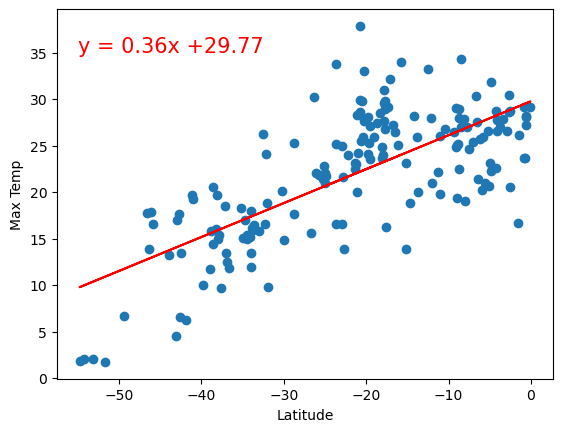

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp'
annote_x = -55
annote_y = 35

regression_constructor(x_values, y_values, x_label, y_label,annote_x,annote_y)


**Discussion about the linear relationship:** 
In the northern hemisphere, as latitude increasesfrom 0 (approaches north pole away from the equator), the temperature tends to drop from about 30 to -20, fairly correlated with an r^2 value of 0.7.  The same behavior may be seen in the southern hemisphere, that as the latitude decreases from 0 (approaches the south pole away from the equator)), the temperature drops from about 30 to 10. This is more loosely correlated at r^2 = 0.52.  This appears to be more a function of span of data range rather than deviation fromt rend.  The southern hemisphere also contains antarctica which is an incomprehensively large landmass and may have more scattered values than that of the norther hemisphere due to topology.  Also sensing station counts probably.  idk.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10403918889542914


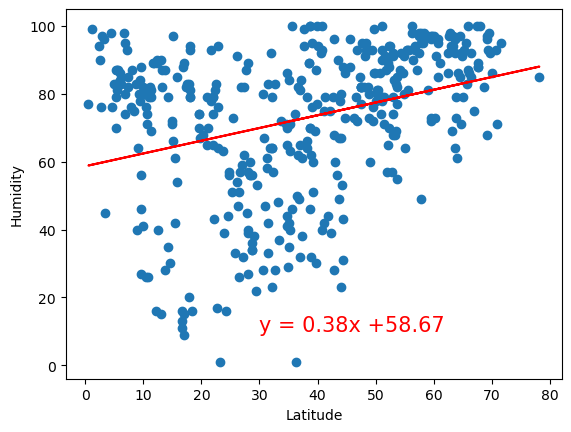

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
annote_x = 30
annote_y = 10

regression_constructor(x_values, y_values, x_label, y_label,annote_x,annote_y)

The r-value is: 0.008914656130006741


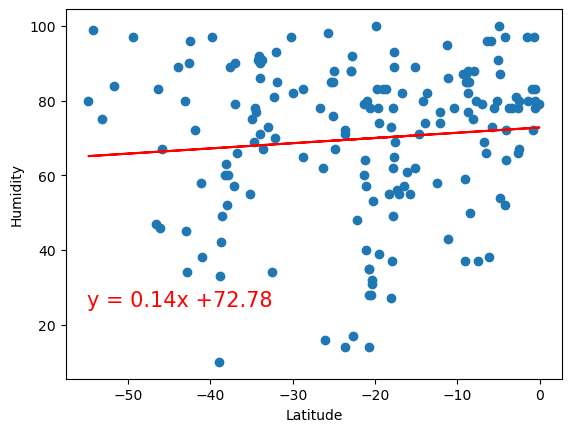

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'
annote_x = -55
annote_y = 25

regression_constructor(x_values, y_values, x_label, y_label,annote_x,annote_y)

**Discussion about the linear relationship:** 
There is loose correlation with humidity between northern and southern hemispheres, ad r^2 of 0.104 nd 0.009 respectively.  There apears to be a convergence behavior of consistency of humidity as the ecuador is deviated from in the northern hemisphere, perhaps due to the decreased temperature drop (the ideal gas law dictates that PV = nRT, after all).  Antarctica is likely a large contributor to the scattered humidity in the southern hemisphere again.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.054839508223424815


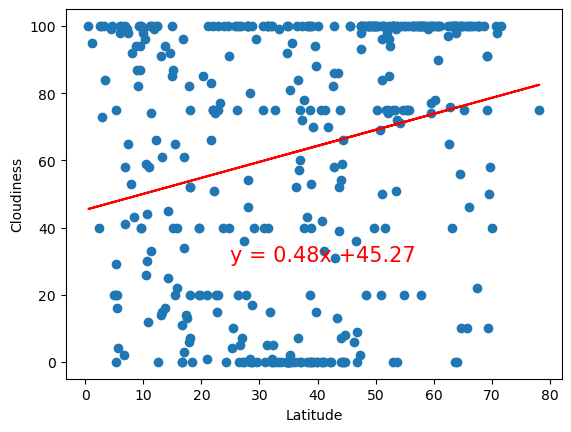

In [56]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
annote_x = 25
annote_y = 30

regression_constructor(x_values, y_values, x_label, y_label,annote_x,annote_y)

The r-value is: 0.002959451491533326


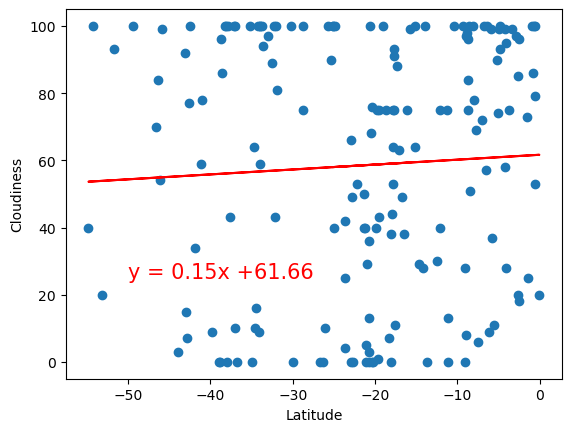

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
annote_x = -50
annote_y = 25

regression_constructor(x_values, y_values, x_label, y_label,annote_x,annote_y)

**Discussion about the linear relationship:** An irritating amount of maximum or minimum cloudiness.  r^2 values 0.05 and 0.003 show little correlation with latitude.  The only thing that the data suggest is that the North apears to have more extreme cloud conditions compared to the south.  Shrug.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.006738925158966713


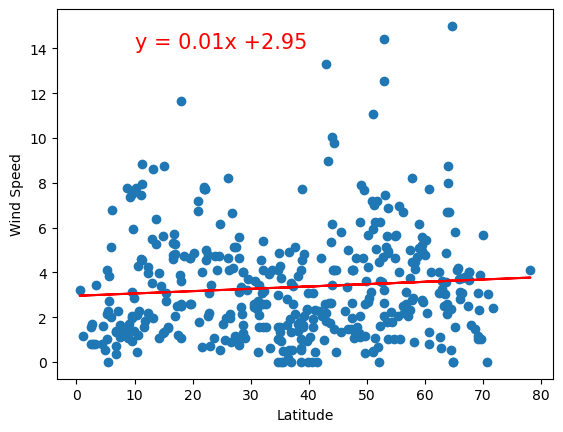

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
annote_x = 10
annote_y = 14

regression_constructor(x_values, y_values, x_label, y_label,annote_x,annote_y)

The r-value is: 0.08427835430676921


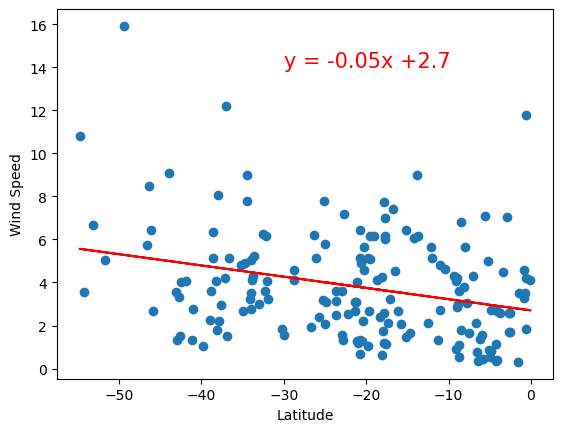

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
annote_x = -30
annote_y = 14

regression_constructor(x_values, y_values, x_label, y_label,annote_x,annote_y)

**Discussion about the linear relationship:** Continuing the trend, r^2 values of 0.007 and 0.08 show little correlation with latitude.  Temperature appears to be the only real contender for correlation, as weather conditions go.